In [186]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
# Use ridge regression with different lambdas and poly degrees to make the predictions

In [188]:
from proj1_helpers import *
from helpers import *
from implementations import *

In [189]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

In [190]:
from plots import cross_validation_visualization
from build_polynomial import *

def cross_validation_demo(poly_degree):
    seed = 1
    degree = poly_degree
    k_fold = 4
    #lambdas = np.logspace(-4, 0, 30)
    lambdas = np.logspace(-2, 0, 30)
    #lambdas = np.logspace(0, 0.1, 10)

    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation
    for lambda_ in lambdas:
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te,w = cross_validation(y, tx, k_indices, k, lambda_, degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))
        print("CV lambda={l}, tr={tr}, te={te}".format( l=lambda_, tr=np.mean(rmse_tr_tmp), te=np.mean(rmse_te_tmp)))   

    cross_validation_visualization(lambdas, rmse_tr, rmse_te,degree)

In [212]:
from plots import cross_validation_visualization_poly
from build_polynomial import *

def cross_validation_demo_poly(lambda_):
    seeds = np.array([1,10,25,100])
    degrees = np.array([1,2,3,4,5,6])
    k_fold = 4
    #lambdas = np.logspace(-2, 0, 30)
    # split data in k fold
    # define lists to store the loss of training data and test data
    # define list to store the variable
    rmse_tr = []
    rmse_te = []
    # cross validation
    for degree in degrees:
        rmse_tr_tmp_d = []
        rmse_te_tmp_d = []
        for index_seed, seed in enumerate(seeds):
            rmse_tr_tmp = []
            rmse_te_tmp = []
            k_indices = build_k_indices(y, k_fold, seed)
            for k in range(k_fold):
                loss_tr, loss_te,w = cross_validation(y, tx, k_indices, k, lambda_, degree)
                rmse_tr_tmp.append(loss_tr)
                rmse_te_tmp.append(loss_te)
            rmse_tr_tmp_d.append(np.mean(rmse_tr_tmp))
            rmse_te_tmp_d.append(np.mean(rmse_te_tmp))
        rmse_tr.append(np.mean(rmse_tr_tmp_d))
        rmse_te.append(np.mean(rmse_te_tmp_d))
        print("CV deg={l}, tr={tr}, te={te}".format( l=degree, tr=np.mean(rmse_tr_tmp), te=np.mean(rmse_te_tmp)))   


    cross_validation_visualization_poly(degrees, rmse_tr, rmse_te,degree)

In [192]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te = y[te_indice]
    y_tr = y[tr_indice]
    x_te = x[te_indice]
    x_tr = x[tr_indice]
    # form data with polynomial degree
    tx_tr = build_poly(x_tr, degree)
    tx_te = build_poly(x_te, degree)
    # ridge regression
    w,_ = ridge_regression(y_tr, tx_tr, lambda_)
    # calculate the loss for train and test data
    loss_tr = np.sqrt(2 * compute_loss(y_tr, tx_tr, w))
    loss_te = np.sqrt(2 * compute_loss(y_te, tx_te, w))
    return loss_tr, loss_te,w

In [193]:

from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    num_data = 10000
    ratio_train = 0.1
    degrees = range(1, 7)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        #np.random.seed(seed)
        #x = np.linspace(0.1, 2 * np.pi, num_data)
        #y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        x=tx
        yt=y
        # split data with a specific seed
        x_tr,y_tr, x_te , y_te = split_data(x, yt, ratio_train, seed)
        
        for index_degree, degree in enumerate(degrees):
            # form polynomial data
            tx_tr = build_poly(x_tr, degree)
            tx_te = build_poly(x_te, degree)
            # least square
           # w = least_squares(y_tr, tx_tr)
            w= ridge_regression(y_tr, tx_tr, 0.01)
            # calculate the rmse for train and test
            rmse_tr[index_seed, index_degree] = np.sqrt(2 * compute_loss(y_tr, tx_tr, w))
            rmse_te[index_seed, index_degree] = np.sqrt(2 * compute_loss(y_te, tx_te, w))

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)
bias_variance_demo()


NameError: name 'seeds' is not defined

In [214]:
y_data,x_data,ind=load_csv_data('data/train.csv/train.csv')

In [215]:

#X=x_data[:,[1,2,3,7,8,9,10,11]] #raw data
#X=x_data[:,13:22] # computed data
#X=x_data[:,[1,2,3,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22]] # computed data
#X=x_data[:,[1,2,3,7,8,9,10,13,14,16,17,19,21,22,29]] # without phi
#X=x_data[:,[1,2,3,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,29]] # wihtout -999
#X=x_data[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29]] # without 11 and 18
X=x_data

#X=replace999(X)

#inv_log_cols = (0,1,2,3,4,5,7,8,9,10,12,13,16,19,21,23,26)
#X_inv_log_cols = np.log(1 / (1 + X[:, inv_log_cols]))
#X[:,inv_log_cols]=X_inv_log_cols
#y_samp, x_samp = sample_data(y_data, X, 1, size_samples=40000)
y_samp =y_data
x_samp = X
#x_samp, mean_x, std_x = standardize(x_samp)
x_samp, mean_x, std_x=standardizeNan(x_samp)

tx = np.c_[np.ones((y_samp.shape[0], 1)), x_samp]
initial_w = np.zeros((tx.shape[1], 1))
#print(X[:,20])
#print(tx[:,21])
y = np.expand_dims(y_samp, axis=1)
#tx[:,21] = np.nan
#print(tx.shape)
#print(y.shape)
#print(initial_w.shape)
#print(tx[:,21])
print(x_data.shape)
print(X.shape)
print(X_inv_log_cols.shape)




(250000, 30)
(250000, 30)
(250000, 17)


In [153]:
print(X[:,0])

[-4.93784952 -5.08720737         nan ..., -4.66774115 -4.56383764
         nan]


CV deg=1, tr=0.8293582537179727, te=0.8294733773653498
CV deg=2, tr=0.7891358934028266, te=0.7893530236694165
CV deg=3, tr=0.7810549035496804, te=0.7813497728639172
CV deg=4, tr=0.7709989091130821, te=0.7715940860300845
CV deg=5, tr=0.764871569846152, te=0.7657019623816256
CV deg=6, tr=0.759455352088287, te=0.7608056885094167
CV deg=7, tr=0.7550398892807206, te=0.7614987449968756


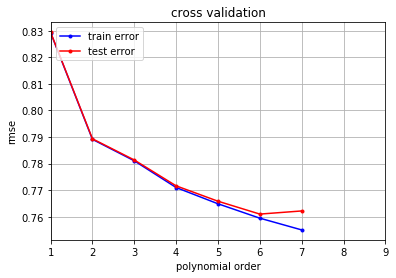

In [196]:
cross_validation_demo_poly(0.1)#different seeds + prepro log positiv 


CV deg=1, tr=0.8233088528232957, te=0.8234488544977702
CV deg=2, tr=0.7844004846127516, te=0.7846569913792018
CV deg=3, tr=0.7759899530818777, te=0.776354058538032
CV deg=4, tr=0.7648587107350517, te=0.7656571843755563
CV deg=5, tr=0.7572644609044916, te=0.7580631299255158
CV deg=6, tr=0.7523947494545495, te=0.7538162186720138
CV deg=7, tr=0.7456815499977983, te=0.7468668963874432


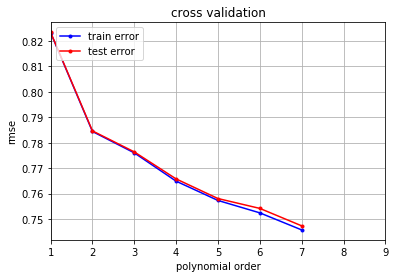

In [197]:
cross_validation_demo_poly(0.01)#different seeds + prepro log positiv 

CV deg=1, tr=0.8229448240406071, te=0.8230909926766832
CV deg=2, tr=0.7839767494593272, te=0.7842481420110713
CV deg=3, tr=0.7753258089925182, te=0.7757068860554803
CV deg=4, tr=0.7643633334160647, te=0.7651976217203527
CV deg=5, tr=0.756609003105869, te=0.7575517349563309
CV deg=6, tr=0.7517136058460377, te=0.7534798643102808
CV deg=7, tr=0.7447244334249383, te=0.7465417164879602


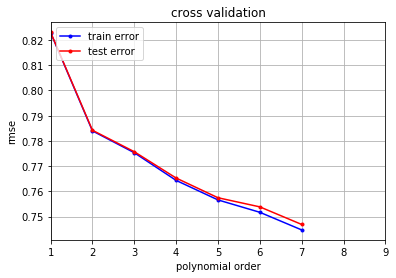

In [198]:
cross_validation_demo_poly(0.001)#different seeds + prepro log positiv 

CV deg=1, tr=0.822939479260439, te=0.8230864505595198
CV deg=2, tr=0.7839308332621371, te=0.7842064316966005
CV deg=3, tr=0.7751297639651225, te=0.775515379034414
CV deg=4, tr=0.7643189450209488, te=0.7651661725034936
CV deg=5, tr=0.756568232806408, te=0.7575419002723814
CV deg=6, tr=0.7516707146894568, te=0.7535390792835243
CV deg=7, tr=0.7446901825336238, te=0.7466865630527701


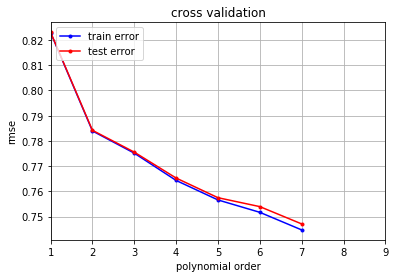

In [199]:
cross_validation_demo_poly(0.0001)#different seeds + prepro log positiv 

CV deg=1, tr=0.825099997181175, te=0.8252495154695112
CV deg=2, tr=0.7941205774208822, te=0.8630991732337885
CV deg=3, tr=0.7804644307518684, te=2.658523508706245
CV deg=4, tr=0.7733722682394921, te=19.99515642095946
CV deg=5, tr=0.7696157750364645, te=174.1121592572019
CV deg=6, tr=0.7660301770941296, te=6474.140133048499


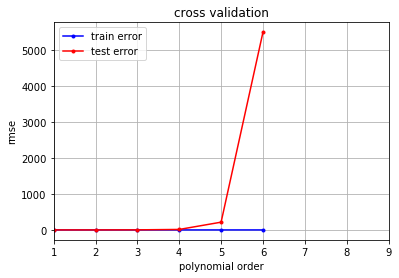

In [216]:
cross_validation_demo_poly(0.0001)# all no prepro log pos

CV deg=1, tr=0.8251016702910072, te=0.8252500172954824
CV deg=2, tr=0.7941254944886316, te=0.8627592369898973
CV deg=3, tr=0.7804768027513668, te=2.649796060381804
CV deg=4, tr=0.7733872422459135, te=19.651969126604488
CV deg=5, tr=0.7696680564122642, te=169.23931912465156
CV deg=6, tr=0.7660861571607461, te=6341.9043831475265


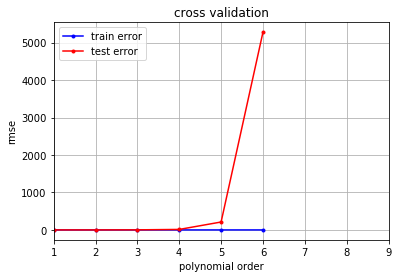

In [218]:
cross_validation_demo_poly(0.001)# all no prepro log pos

CV deg=1, tr=0.8252435860982692, te=0.8253829987924657
CV deg=2, tr=0.7944308781711563, te=0.8616496274072627
CV deg=3, tr=0.7810539980944667, te=2.5956924948123854
CV deg=4, tr=0.7739242635967165, te=18.113034713062145
CV deg=5, tr=0.7703464820674707, te=173.91562365868623
CV deg=6, tr=0.766832930198817, te=6313.914742878114


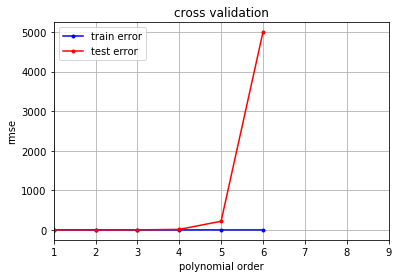

In [219]:
cross_validation_demo_poly(0.01)# all no prepro log pos

CV deg=1, tr=0.8301690785580039, te=0.8302821191215762
CV deg=2, tr=0.799448412688769, te=0.8677851389458617
CV deg=3, tr=0.7868234992529037, te=2.270250148241993
CV deg=4, tr=0.7788027584446474, te=10.965829612464228
CV deg=5, tr=0.7751735274235588, te=212.34087233843903
CV deg=6, tr=0.7729408293098519, te=4842.451983394593


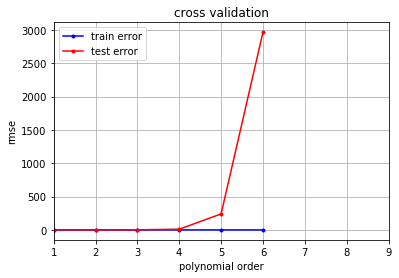

In [220]:
cross_validation_demo_poly(0.1)# all no prepro log pos

CV deg=1, tr=0.8293849924780269, te=0.82953427152373
CV deg=2, tr=0.7953358074548322, te=0.8584014406709268
CV deg=3, tr=0.781947067942684, te=2.5240861959821905
CV deg=4, tr=0.7749528696633672, te=17.72168243680905
CV deg=5, tr=0.7713084338069324, te=178.56032023319682


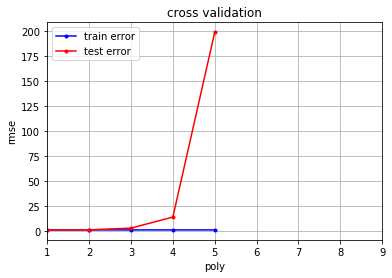

In [73]:
cross_validation_demo_poly(0.0001)# with out 11 &18

CV deg=1, tr=0.829386805323465, te=0.8295347346751113
CV deg=2, tr=0.7953414175612205, te=0.8578843980189441
CV deg=3, tr=0.7819592028526018, te=2.5107297099202532
CV deg=4, tr=0.7749678553702568, te=17.386460273148458
CV deg=5, tr=0.7713244709394883, te=177.00453922148182


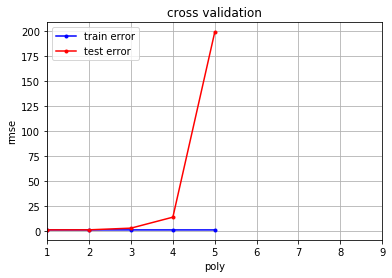

In [74]:
cross_validation_demo_poly(0.001)# with out 11 &18

CV deg=1, tr=0.8295411993520996, te=0.8296784715557088
CV deg=2, tr=0.7956912562667577, te=0.8553464353788749
CV deg=3, tr=0.7825529577573597, te=2.423314722031961
CV deg=4, tr=0.7755360420588319, te=15.852812884400329
CV deg=5, tr=0.7719091301286051, te=180.41744078643364


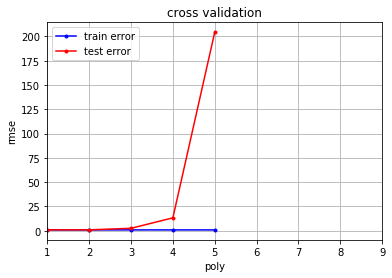

In [75]:
cross_validation_demo_poly(0.01)# with out 11 &18

CV deg=1, tr=0.834848725531287, te=0.834951593528786
CV deg=2, tr=0.8015469360654572, te=0.85695073334717
CV deg=3, tr=0.7891587878217045, te=2.0150566474812575
CV deg=4, tr=0.7812898858070629, te=9.282904202867831
CV deg=5, tr=0.7775026380624439, te=198.08540022729994


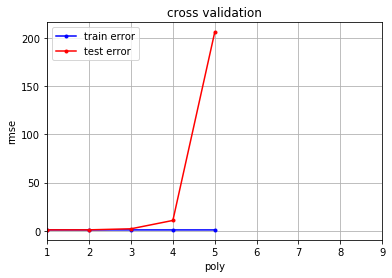

In [76]:
cross_validation_demo_poly(0.1)# with out 11 &18

CV deg=1, tr=0.8533444322196595, te=0.8534207551693338
CV deg=2, tr=0.8157721430878615, te=0.8573696243720734
CV deg=3, tr=0.803218384024609, te=1.2554738392124802
CV deg=4, tr=0.7963986063692525, te=2.780711495224471
CV deg=5, tr=0.7942393271731257, te=205.77758019499117


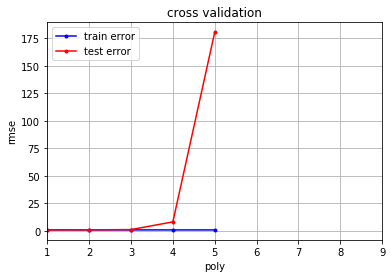

In [77]:
cross_validation_demo_poly(0.5)# with out 11 &18

CV lambda=0.0001, tr=0.7953934325860804, te=0.8701787022696421
CV lambda=0.00013738237958832623, tr=0.7953934884244465, te=0.8701356584176319
CV lambda=0.00018873918221350977, tr=0.7953935929407644, te=0.870077291499362
CV lambda=0.0002592943797404667, tr=0.795393788026721, te=0.8699985043571765
CV lambda=0.0003562247890262444, tr=0.795394150864941, te=0.8698927822659221
CV lambda=0.0004893900918477494, tr=0.795394822669761, te=0.8697519992773174
CV lambda=0.0006723357536499335, tr=0.7953960596772958, te=0.8695663341593687
CV lambda=0.0009236708571873865, tr=0.7953983224398626, te=0.8693243829138849
CV lambda=0.0012689610031679222, tr=0.7954024300102196, te=0.8690135534390213
CV lambda=0.0017433288221999873, tr=0.7954098217771842, te=0.8686208003747826
CV lambda=0.002395026619987486, tr=0.7954229919122836, te=0.8681337350324729
CV lambda=0.0032903445623126675, tr=0.7954461841791337, te=0.8675422085351018
CV lambda=0.004520353656360241, tr=0.7954864388077154, te=0.8668406835071629
CV la

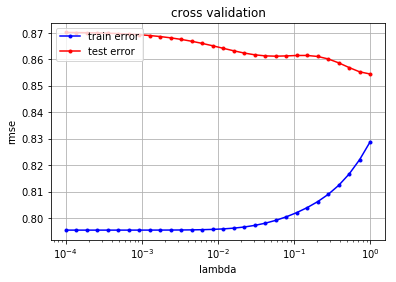

In [79]:
cross_validation_demo(2) # poly 2 without 11 &18


CV lambda=0.0001, tr=0.7820113904210804, te=3.011094967068975
CV lambda=0.00013738237958832623, tr=0.7820115204509801, te=3.008893528335673
CV lambda=0.00018873918221350977, tr=0.7820117619673886, te=3.0059415558790783
CV lambda=0.0002592943797404667, tr=0.7820122082823613, te=3.0020143186873725
CV lambda=0.0003562247890262444, tr=0.7820130278488538, te=2.9968412999555176
CV lambda=0.0004893900918477494, tr=0.7820145213156775, te=2.9901093008766724
CV lambda=0.0006723357536499335, tr=0.7820172184690279, te=2.9814708858077026
CV lambda=0.0009236708571873865, tr=0.7820220401321404, te=2.9705545765235133
CV lambda=0.0012689610031679222, tr=0.7820305634704421, te=2.9569667290842188
CV lambda=0.0017433288221999873, tr=0.7820454457912107, te=2.940269290240374
CV lambda=0.002395026619987486, tr=0.78207107508247, te=2.919919765679965
CV lambda=0.0032903445623126675, tr=0.7821145078986534, te=2.8951765798590174
CV lambda=0.004520353656360241, tr=0.7821866985997443, te=2.8650022630547705
CV lamb

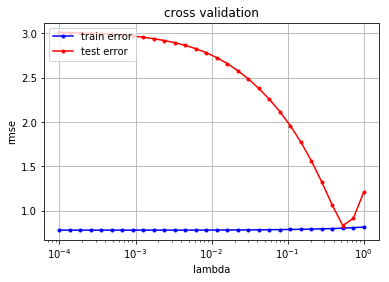

In [80]:
cross_validation_demo(3) # poly 2 without 11 &18


In [107]:
polyN=3
tx_tr = build_poly(tx, polyN) # full set 250K only computed data
w,loss=ridge_regression(y, tx_tr, 0.53)
y_prime = predict_labels(w,tx_tr)
print(loss)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.32338372]]
[[ 0.21435987]]


CV lambda=0.01, tr=0.7811107926845499, te=2.998829380642754
CV lambda=0.0117210229753348, tr=0.7812554451680915, te=2.9729519366448645
CV lambda=0.01373823795883263, tr=0.7814285162913772, te=2.9445743256102195
CV lambda=0.01610262027560939, tr=0.781633276127687, te=2.9135729589901445
CV lambda=0.018873918221350976, tr=0.7818727211410261, te=2.8798454032323466
CV lambda=0.022122162910704492, tr=0.7821494044078501, te=2.8433041071145237
CV lambda=0.02592943797404667, tr=0.7824652902699619, te=2.8038641289156923
CV lambda=0.03039195382313198, tr=0.7828216646451416, te=2.76142509614215
CV lambda=0.035622478902624426, tr=0.7832191321725692, te=2.715848648326443
CV lambda=0.041753189365604, tr=0.7836577251511341, te=2.666933683932758
CV lambda=0.04893900918477494, tr=0.7841371373971208, te=2.61439266749475
CV lambda=0.057361525104486784, tr=0.7846570809874592, te=2.5578328481990704
CV lambda=0.06723357536499334, tr=0.7852177485770437, te=2.4967463211916616
CV lambda=0.07880462815669913, tr=

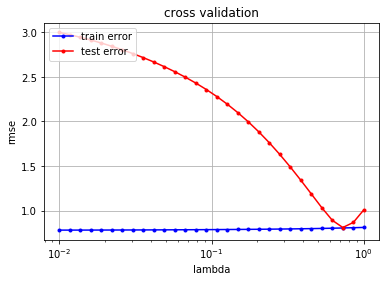

In [97]:
cross_validation_demo(3) # poly 2 with Fzll


In [102]:
polyN=3
tx_tr = build_poly(tx, polyN) # full set 
w,loss=ridge_regression(y, tx_tr, 0.73)
y_prime = predict_labels(w,tx_tr)
print(loss)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.32793761]]
[[ 0.22006512]]


CV lambda=0.0001, tr=0.7749636167858612, te=3.5137199829027366
CV lambda=0.00013738237958832623, tr=0.7749637969035428, te=3.5428251371905084
CV lambda=0.00018873918221350977, tr=0.7749641261672793, te=3.582127727287162
CV lambda=0.0002592943797404667, tr=0.7749647222554462, te=3.634920148299176
CV lambda=0.0003562247890262444, tr=0.7749657888036685, te=3.7053765392934777
CV lambda=0.0004893900918477494, tr=0.7749676714704646, te=3.798701135019922
CV lambda=0.0006723357536499335, tr=0.7749709462962611, te=3.9212885514752482
CV lambda=0.0009236708571873865, tr=0.7749765592790271, te=4.080925337125276
CV lambda=0.0012689610031679222, tr=0.7749860502576257, te=4.287078236106035
CV lambda=0.0017433288221999873, tr=0.7750019150210422, te=4.551288180429503
CV lambda=0.002395026619987486, tr=0.7750281768505493, te=4.887578027653922
CV lambda=0.0032903445623126675, tr=0.7750712261792377, te=5.312594851754159
CV lambda=0.004520353656360241, tr=0.7751409070560489, te=5.845052509325767
CV lambda=

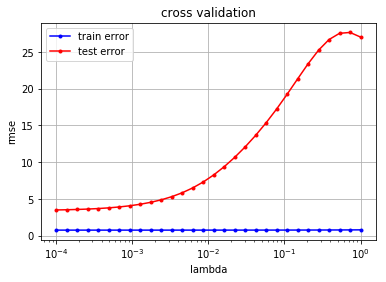

In [81]:
cross_validation_demo(4) # poly 2 without 11 &18


CV lambda=0.0001, tr=0.7712592373894697, te=458.42424416343556
CV lambda=0.00013738237958832623, tr=0.7712594258430961, te=458.33267618319167
CV lambda=0.00018873918221350977, tr=0.7712597691023042, te=458.224846590057
CV lambda=0.0002592943797404667, tr=0.7712603880249462, te=458.1070596193956
CV lambda=0.0003562247890262444, tr=0.7712614909284616, te=457.99457664776304
CV lambda=0.0004893900918477494, tr=0.7712634311030463, te=457.9162405224645
CV lambda=0.0006723357536499335, tr=0.7712667997568567, te=457.9185165139721
CV lambda=0.0009236708571873865, tr=0.7712725777107818, te=458.06592832559653
CV lambda=0.0012689610031679222, tr=0.7712823841822938, te=458.43336540837385
CV lambda=0.0017433288221999873, tr=0.7712988755546198, te=459.0856034327511
CV lambda=0.002395026619987486, tr=0.7713263430914579, te=460.04193163506375
CV lambda=0.0032903445623126675, tr=0.7713715078367916, te=461.22934167479997
CV lambda=0.004520353656360241, tr=0.7714443912215919, te=462.43527150284683
CV lamb

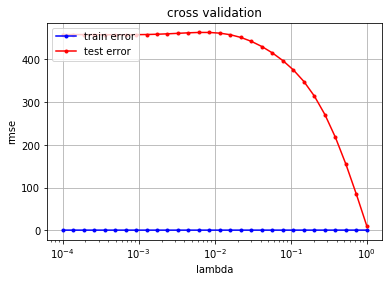

In [82]:
cross_validation_demo(5) # poly 2 without 11 &18


CV lambda=1.0, tr=0.8092716313503914, te=9.72952289848345
CV lambda=1.0259143654700098, tr=0.8099134485936671, te=3.666960559354671
CV lambda=1.052500285277733, tr=0.8105600947016999, te=3.634898248620254
CV lambda=1.0797751623277096, tr=0.8112113955045257, te=9.689897561628413
CV lambda=1.107756850509709, tr=0.8118671728426955, te=15.740904678219982
CV lambda=1.1364636663857248, tr=0.8125272448181012, te=21.782409403018537
CV lambda=1.1659144011798317, tr=0.81319142610557, te=27.811735312323417
CV lambda=1.1961283330787535, tr=0.8138595282329911, te=33.82647121304162
CV lambda=1.22712523985119, tr=0.814531359866255, te=39.82427603007137
CV lambda=1.2589254117941673, tr=0.8152067271427712, te=45.802841518689654


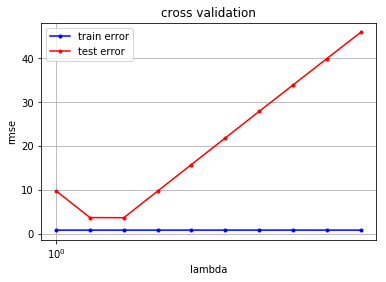

In [93]:
cross_validation_demo(5) # poly 2 without 11 &18


In [116]:
polyN=5
tx_tr = build_poly(tx, polyN) # full set 
w,loss=ridge_regression(y, tx_tr, 1.04)
y_prime = predict_labels(w,tx_tr)
print(loss)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.32829539]]
[[ 0.21922707]]


In [131]:
polyN=6
tx_tr = build_poly(tx, polyN) # full set 
w,loss=ridge_regression(y, tx_tr, 0.01)
y_prime = predict_labels(w,tx_tr)
print(loss)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.2956873]]
[[ 0.18629051]]


In [135]:
polyN=5
tx_tr = build_poly(tx, polyN) # full set 
w,loss=ridge_regression(y, tx_tr, 0.001)
y_prime = predict_labels(w,tx_tr)
print(loss)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.29771639]]
[[ 0.18734836]]


In [206]:
polyN=5
tx_tr = build_poly(tx, polyN) # full set 
w,loss=ridge_regression(y, tx_tr, 0.001)
y_prime = predict_labels(w,tx_tr)
print(loss)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.28631153]]
[[ 0.17478158]]


In [148]:
polyN=5
tx_tr = build_poly(tx, polyN) # full set New BEST one with preprocessing with log postive
w,loss=ridge_regression(y, tx_tr, 0.0001)
y_prime = predict_labels(w,tx_tr)
print(loss)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.28628115]]
[[ 0.17458335]]


In [210]:
polyN=6
tx_tr = build_poly(tx, polyN) # full set New BEST one with preprocessing with log postive
w,loss=ridge_regression(y, tx_tr, 0.0001)
y_prime = predict_labels(w,tx_tr)
print(loss)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.28262431]]
[[ 0.1739378]]


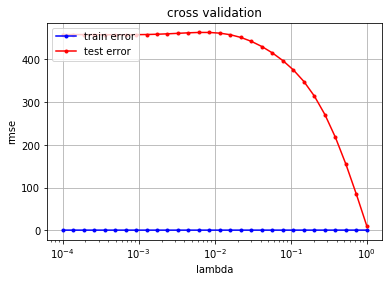

In [10]:
cross_validation_demo(5) # poly 5 derived data


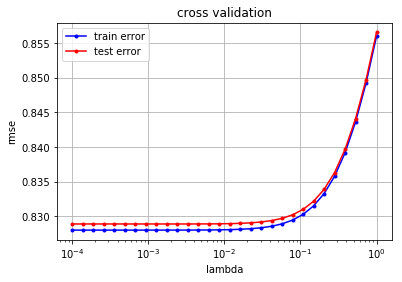

In [224]:
cross_validation_demo(3) #poly 3 derived data

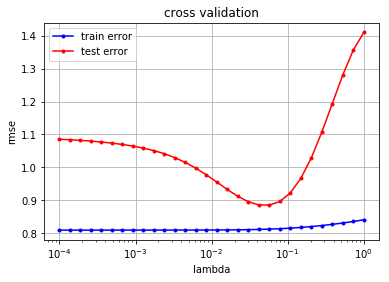

In [225]:
cross_validation_demo(7)#poly 7 derived data

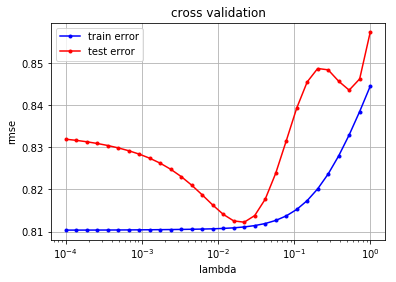

In [226]:
cross_validation_demo(6)#poly 6 derived data

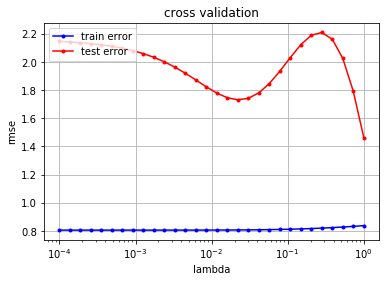

In [227]:
cross_validation_demo(8)#poly 8 computed data

In [ ]:
#FULL data features with prePro

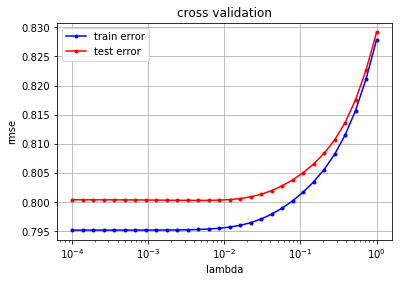

In [24]:

cross_validation_demo(2)#poly 3 computed Full data



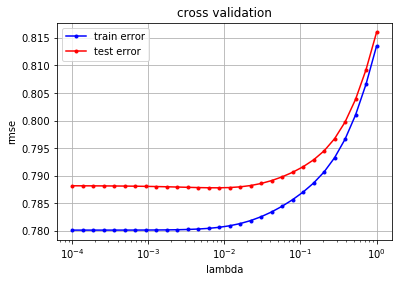

In [25]:

cross_validation_demo(3)#poly 3 computed Full data



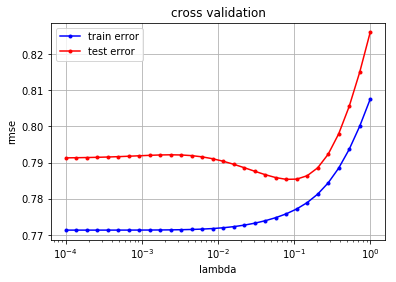

In [26]:
cross_validation_demo(4)#poly 3 computed Full data


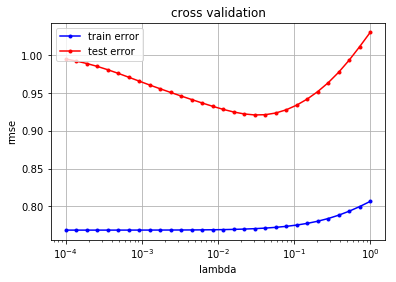

In [58]:
cross_validation_demo(5)#poly 3 computed Full data


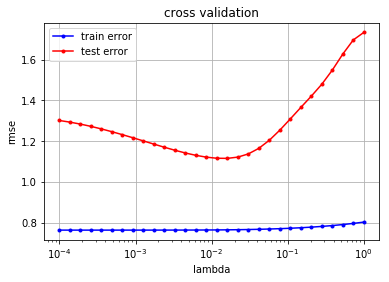

In [60]:
cross_validation_demo(6)#poly 3 computed Full data



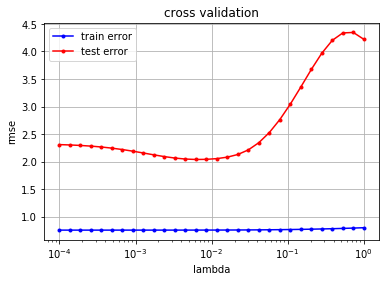

In [32]:
cross_validation_demo(7)#poly 3 computed Full data



In [103]:
losses = []
tx_tr = build_poly(tx, 2) # full set 250K only computed data
w=ridge_regression(y, tx_tr, 0.001)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)
losses.append(loss)

[[ 0.19377301]]


In [85]:
tx_tr = build_poly(tx, 3) # full set 250K only computed data
w=ridge_regression(y, tx_tr, 0.02)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)
losses.append(loss)

[[ 0.18764881]]


In [86]:
tx_tr = build_poly(tx, 4) # full set 250K only computed data
w=ridge_regression(y, tx_tr, 0.02)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)
losses.append(loss)

[[ 0.18756768]]


In [87]:
tx_tr = build_poly(tx, 5) # full set 250K only computed data
w=ridge_regression(y, tx_tr, 0.02)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)
losses.append(loss)

[[ 0.18789043]]


In [88]:
tx_tr = build_poly(tx, 6) # full set 250K only computed data
w=ridge_regression(y, tx_tr, 0.02)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)# the minimum obtained with the full set is with poly 6
losses.append(loss)

[[ 0.18497903]]


In [89]:
tx_tr = build_poly(tx, 7) # full set 250K all data features
w=ridge_regression(y, tx_tr, 0.02)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)
losses.append(loss)

[[ 0.17955915]]


In [81]:
    plt.plot(poly, mse_tr, marker=".", color='b', label='train error')
    plt.plot(poly, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("poly")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")
    plt.xlim(2, 9)

NameError: name 'poly' is not defined

In [12]:
cross_validation_demo_poly(0.02)

2


ValueError: could not broadcast input array from shape (187500,31) into shape (187500)

2
3
4
5
6
7
8


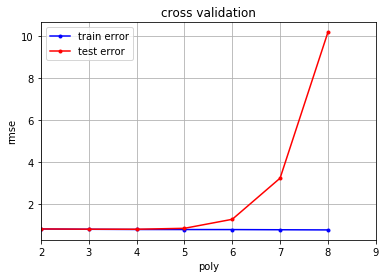

In [49]:
cross_validation_demo_poly(0.1)

In [31]:
tx_tr = build_poly(tx, 6) # full set 250K all data features
w=ridge_regression(y, tx_tr, 0.002)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)

[[ 0.18265256]]


In [327]:
tx_tr = build_poly(tx, 3) # full set 250K all data features
w=ridge_regression(y, tx_tr, 0.001)
y_prime = predict_labels(w,tx_tr)

sum(abs(y_prime-y))#5th submission 

array([ 115744.])

In [537]:
polyN = 5
tx_tr = build_poly(tx, polyN) # full set 250K all data features with preprocessing
w=ridge_regression(y, tx_tr, 0.0001)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))#9th sub B

array([ 20108.])

In [521]:
polyN = 5
tx_tr = build_poly(tx, polyN) # full set 250K all data features no prepro
w=ridge_regression(y, tx_tr, 0.0001)
y_prime = predict_labels(w,tx_tr)
sum(abs(y_prime-y))#7th submission 

array([ 101998.])

In [61]:
polyN=4
tx_tr = build_poly(tx, polyN) # full set 250K only computed data
w=ridge_regression(y, tx_tr, 0.01)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)
losses.append(loss)

[[ 0.18826202]]


NameError: name 'losses' is not defined

In [62]:
polyN=3
tx_tr = build_poly(tx, polyN) # full set 250K only computed data
w=ridge_regression(y, tx_tr, 0.01)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)
losses.append(loss)

[[ 0.1885893]]


NameError: name 'losses' is not defined

In [194]:
polyN=5
tx_tr = build_poly(tx, polyN) # full set 250K only computed£ data
#tx_tr_22=x_data[:,22]
#tx_tr_22 = np.expand_dims(tx_tr_22, axis=1)
print(tx_tr_22.shape)
#np.append(tx_tr,tx_tr_22,axis=1)
tx_tr[:,22]=x_data[:,20]
#tx_tr[:,54]=x_data[:,22]
#tx_tr[:,85]=x_data[:,22]
#tx_tr[:,116]=x_data[:,22]
print(tx_tr.shape)
tx_tr=np.delete(tx_tr, [51,80,109,138], axis=1)
print(tx_tr.shape)
print(tx_tr[:,22])
w=ridge_regression(y, tx_tr, 0.0001)
y_prime = predict_labels(w,tx_tr)
loss=compute_loss(y_prime,tx_tr,w);
print(loss)
#losses.append(l
np.argwhere(np.isnan(tx_tr))

(250000, 1)
(250000, 146)
(250000, 142)
[-0.277 -1.916 -2.186 ..., -2.89   0.811 -1.596]
[[ 0.1877908]]


array([], shape=(0, 2), dtype=int64)

In [96]:
print(tx_tr[:,23])

[ nan  nan  nan ...,  nan  nan  nan]


In [52]:
a=np.array([[1,2],[3,4]])
print(a.shape)
b=np.array([[1,1]])
print(b.shape)
np.append(a,b.T,axis=1)

(2, 2)
(1, 2)


array([[1, 2, 1],
       [3, 4, 1]])

In [149]:
#create subsmission with the previous computed w should take the features accordingly
y_data,x_data,ind=load_csv_data('data/test.csv/test.csv')
#X=x_data[:,[1,2,3,7,8,9,10,11]] #raw data
#X=x_data[:,[1,2,3,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22]] # all data
#X=x_data[:,13:22] # computed data
#X=x_data[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29]] # without phi
X=x_data
#X=x_data[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29]] # without 11 and 18
#X=x_data[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,28,29]] # without 11 and 18

inv_log_cols = (0,1,2,3,4,5,7,8,9,10,12,13,16,19,21,23,26)
X_inv_log_cols = np.log(1 / (1 + x_data[:, inv_log_cols]))
X[:,inv_log_cols]=X_inv_log_cols

y_samp =y_data
x_samp = X
x_samp, mean_x, std_x = standardizeNan(x_samp)
tx = np.c_[np.ones((y_samp.shape[0], 1)), x_samp]
initial_w = np.zeros((tx.shape[1], 1))
y = np.expand_dims(y_samp, axis=1)
#tx[:,21] = np.nan
tx_tr = build_poly(tx, polyN) # full set 250K
#np.argwhere(np.isnan(tx_tr))
#tx_tr[:,22]=x_data[:,20]
#tx_tr=np.delete(tx_tr, [54,85,116], axis=1)
#tx_tr=np.delete(tx_tr, [51,80,109,138], axis=1)

#tx_tr=np.delete(tx_tr, [55,86,117], axis=1)
y_prime = predict_labels(w,tx_tr)
create_csv_submission(ind, y_prime, 'data/sample-submission.csv')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


In [109]:
print(tx_tr.shape)

(568238, 88)
